In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import ultralytics
device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model = model.to(device)

Using cache found in /home/dabid/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-7-11 Python-3.9.21 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 3780MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [3]:
from PIL import Image
img = Image.open("./received_frame_210.jpg")

In [4]:
res=model(img)

/home/dabid/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [5]:
df = pd.DataFrame(res.pandas().xyxy[0])

In [6]:
X_min = df["xmin"]
X_max = df["xmax"]
y_min = df["ymin"]
y_max = df["ymax"]

In [13]:
import cv2

img = cv2.imread("./received_frame_210.jpg")
print(img.shape)
for i in range(len(df)):
    x1 = int(df['xmin'].iloc[i])
    y1 = int(df['ymin'].iloc[i])
    x2 = int(df['xmax'].iloc[i])
    y2 = int(df['ymax'].iloc[i])
    print(x1)
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

(360, 480, 3)
78
5


In [14]:
idk = Image.fromarray(img)

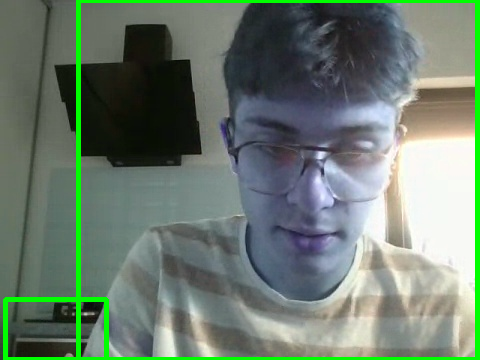

In [15]:
idk